En este análisis, se trabajó con datos de productos de Amazon, que incluye información sobre nombres, categorías, precios, porcentajes de descuento, calificaciones y reseñas de los usuarios. El análisis incluyen:
Limpieza de Datos: Normalización de precios y porcentajes, manejo de valores nulos y eliminación de duplicados.
Análisis Descriptivo: Exploración de estadísticas básicas, como distribuciones de precios y calificaciones.
Visualizaciones: Uso de gráficos como histogramas, mapas de calor y gráficos de barras para ilustrar patrones y tendencias clave.
Conclusiones: Resumen de hallazgos significativos sobre la relación entre precios, descuentos, categorías de productos y calificaciones de los usuarios.
El propósito final es obtener una comprensión más clara de los datos y su estructura, identificando factores importantes que pueden influir en las decisiones estratégicas para vendedores o consumidores en plataformas de comercio electrónico.

Estadísticas descriptivas:
       discounted_price   actual_price  discount_percentage   rating_count
count       1465.000000    1465.000000          1465.000000    1465.000000
mean        3125.310874    5444.990635            47.691468   18277.634812
std         6944.304394   10874.826864            21.635905   42727.398216
min           39.000000      39.000000             0.000000       2.000000
25%          325.000000     800.000000            32.000000    1191.000000
50%          799.000000    1650.000000            50.000000    5179.000000
75%         1999.000000    4295.000000            63.000000   17325.000000
max        77990.000000  139900.000000            94.000000  426973.000000

Conteo de productos por categoría principal:
main_category
Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health

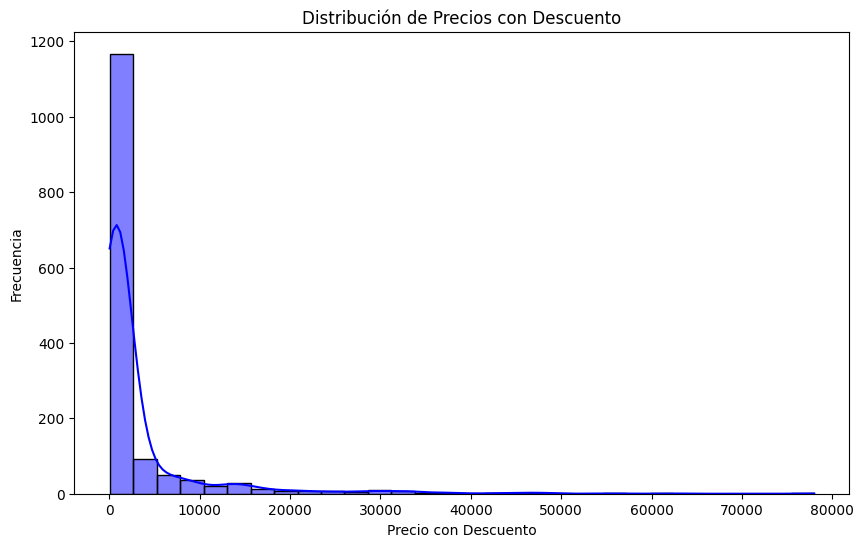

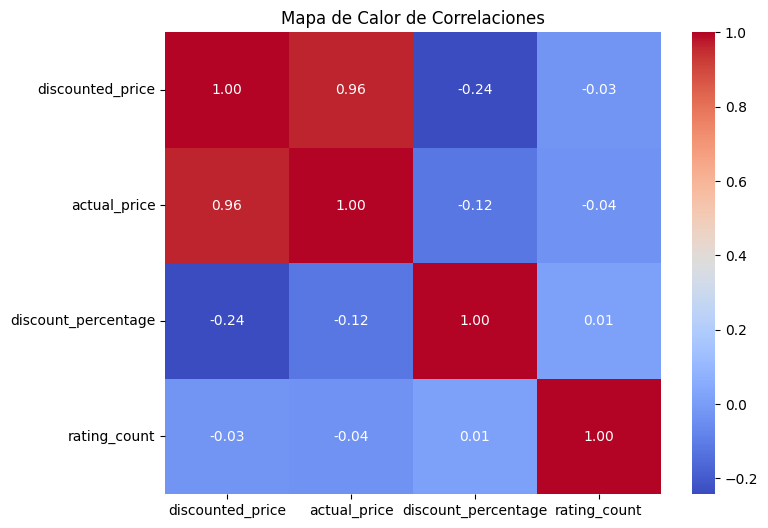

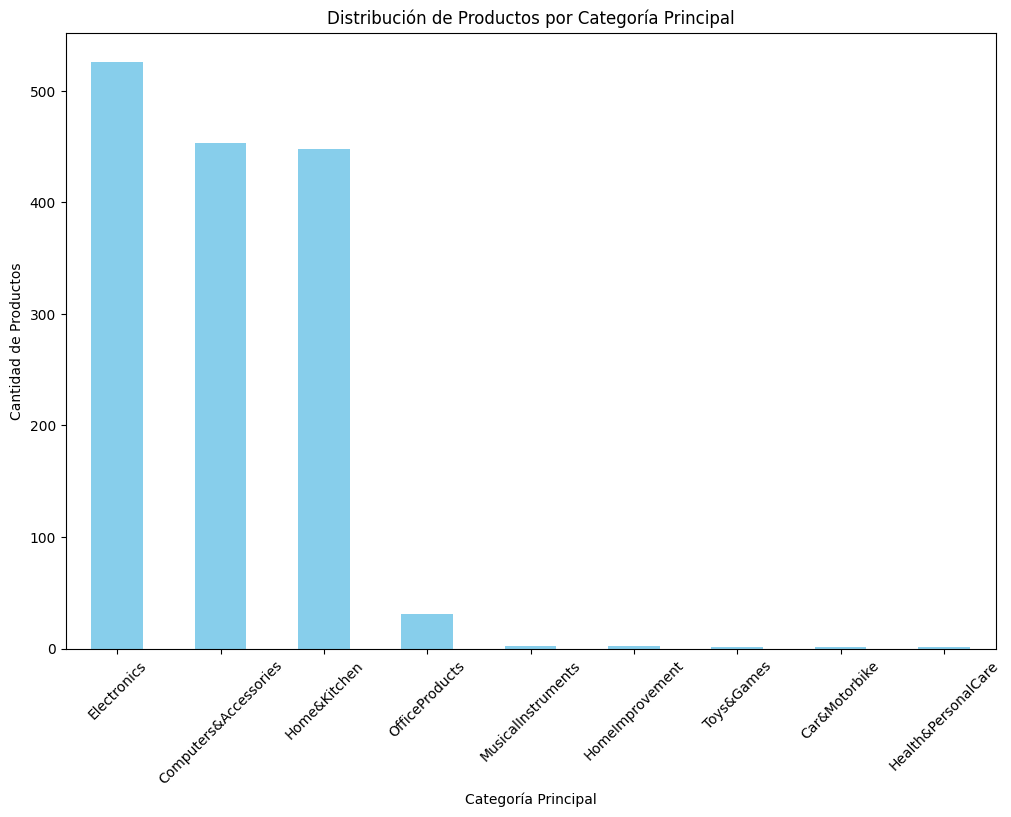

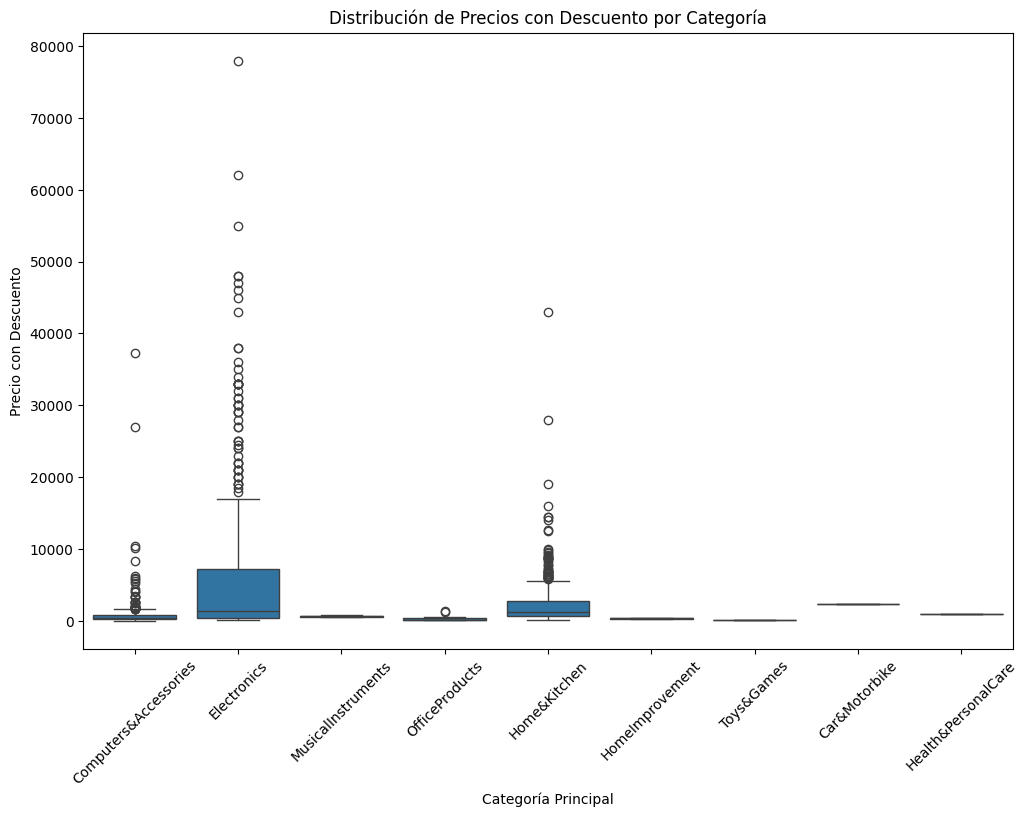

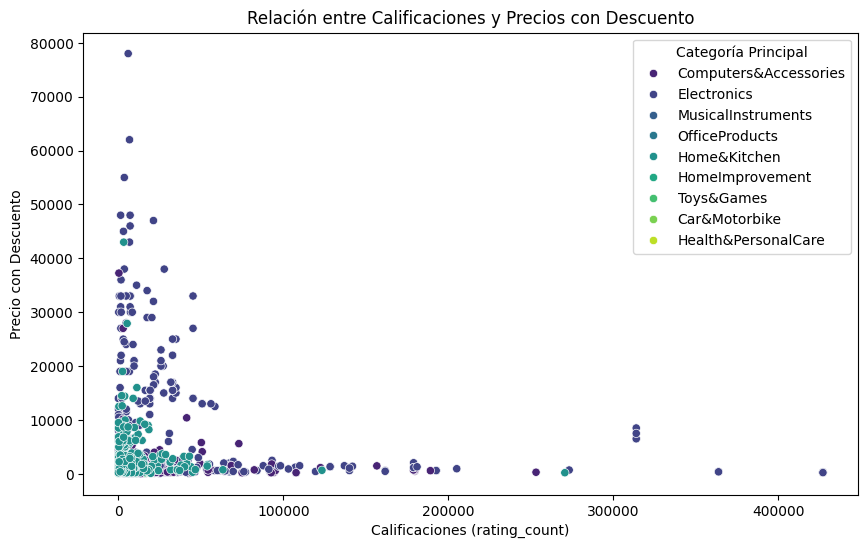


Promedio de descuento por categoría principal:
main_category
HomeImprovement          57.500000
Computers&Accessories    54.024283
Health&PersonalCare      53.000000
Electronics              50.828897
MusicalInstruments       46.000000
Car&Motorbike            42.000000
Home&Kitchen             40.120536
OfficeProducts           12.354839
Toys&Games                0.000000
Name: discount_percentage, dtype: float64


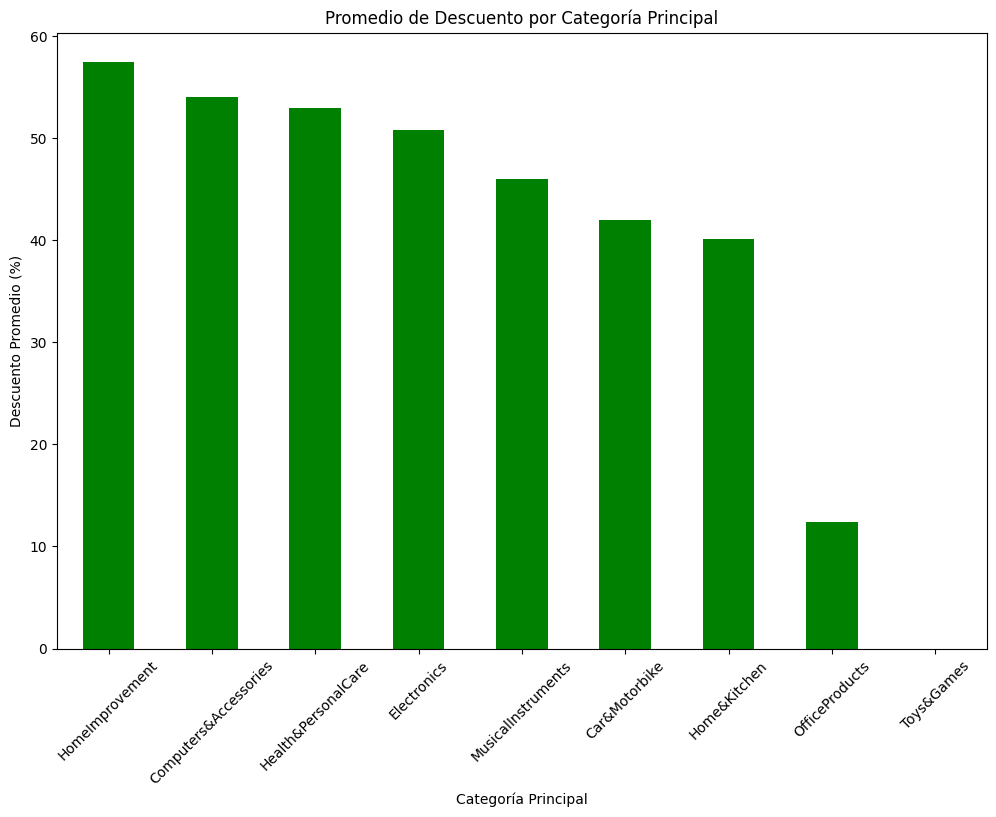


Productos más vendidos:
                                          product_name  rating_count  \
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0   
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0   
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0   
684  AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0   
352  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0   

     discounted_price  
12              219.0  
47              309.0  
65              309.0  
684             219.0  
352             349.0  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'amazon.csv'
data = pd.read_csv(file_path)

# 1. Limpieza de Datos
def clean_price(price):
    if isinstance(price, str):
        return float(price.replace('₹', '').replace(',', '').strip())
    return price

data['discounted_price'] = data['discounted_price'].apply(clean_price)
data['actual_price'] = data['actual_price'].apply(clean_price)
data['discount_percentage'] = data['discount_percentage'].str.replace('%', '').astype(float)
data['rating_count'] = data['rating_count'].str.replace(',', '').astype(float)

data = data.drop_duplicates()

data['rating_count'] = data['rating_count'].fillna(data['rating_count'].median())

data['main_category'] = data['category'].apply(lambda x: x.split('|')[0])

# 2. Análisis Descriptivo
print("Estadísticas descriptivas:")
print(data[['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']].describe())

category_counts = data['main_category'].value_counts()
print("\nConteo de productos por categoría principal:")
print(category_counts)

top_discounts = data.nlargest(5, 'discount_percentage')[['product_name', 'discount_percentage', 'actual_price', 'discounted_price']]
print("\nProductos con mayores descuentos:")
print(top_discounts)

# 3. Visualizaciones
plt.figure(figsize=(10, 6))
sns.histplot(data['discounted_price'], kde=True, bins=30, color='blue')
plt.title('Distribución de Precios con Descuento')
plt.xlabel('Precio con Descuento')
plt.ylabel('Frecuencia')
plt.show()

correlation_matrix = data[['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Productos por Categoría Principal')
plt.xlabel('Categoría Principal')
plt.ylabel('Cantidad de Productos')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='main_category', y='discounted_price', data=data)
plt.title('Distribución de Precios con Descuento por Categoría')
plt.xlabel('Categoría Principal')
plt.ylabel('Precio con Descuento')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating_count', y='discounted_price', hue='main_category', data=data, palette='viridis')
plt.title('Relación entre Calificaciones y Precios con Descuento')
plt.xlabel('Calificaciones (rating_count)')
plt.ylabel('Precio con Descuento')
plt.legend(title='Categoría Principal', bbox_to_anchor=(1, 1))
plt.show()

# 4. Análisis Avanzado
avg_discount_by_category = data.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)
print("\nPromedio de descuento por categoría principal:")
print(avg_discount_by_category)

plt.figure(figsize=(12, 8))
avg_discount_by_category.plot(kind='bar', color='green')
plt.title('Promedio de Descuento por Categoría Principal')
plt.xlabel('Categoría Principal')
plt.ylabel('Descuento Promedio (%)')
plt.xticks(rotation=45)
plt.show()

top_selling_products = data.nlargest(5, 'rating_count')[['product_name', 'rating_count', 'discounted_price']]
print("\nProductos más vendidos:")
print(top_selling_products)

En este análisis pudimos encontramos patrones sobre los productos de Amazon y cómo se manejan sus precios y calificaciones. Por ejemplo, los productos con mayores descuentos suelen ser los de precios originales más altos, lo que probablemente responde a estrategias de marketing. Al mismo tiempo, las categorías relacionadas con accesorios tecnológicos dominan tanto en cantidad como en diversidad, mostrando su alta demanda en el mercado.

Algo que mellamó la atención fue cómo los productos con más calificaciones tienden a tener precios competitivos o descuentos llamativos. Esto sugiere que los vendedores buscan aprovechar la popularidad para mantener las ventas activas. Pero no todo es tan lineal, las calificaciones altas no siempre están asociadas con grandes descuentos, lo que demuestra que la percepción del consumidor puede depender de otros factores, como la marca o la utilidad del producto.

Finalmente, los datos reflejan una dinámica interesante en cómo las estrategias de precios y descuentos varían según la categoría. Esto podría ser un área de oportunidad para los vendedores, quienes podrían ajustar su enfoque dependiendo del tipo de producto que ofrezcan.